# Lasso、リッジ回帰

In [1]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import preprocesses
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import numpy as np

In [2]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])
y=new_train[["SalePrice"]]
X=new_train.drop(["SalePrice"], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=2020)

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [4]:
new_train.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,Baths
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2008,12.247694,4
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,2007,12.109011,3
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,2008,12.317167,4
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2006,11.849398,2
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,2008,12.429216,4


In [15]:
#リッジ回帰
from sklearn.linear_model import Ridge
RMSE=[]
r2_scores=[]
testRMSE=[]
alphas = 10**np.linspace(5, -5, 100)
for alpha in alphas:#parameter change
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', Ridge(alpha = alpha, normalize = True))])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, X_train, y_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))
    mdl=Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', Ridge(alpha = alpha, normalize = True))])
    mdl.fit(X_train, y_train)
    testRMSE.append(np.sqrt(mean_squared_error(y_valid['SalePrice'], mdl.predict(X_valid))))

In [16]:

print(min(RMSE))
print(alphas[RMSE.index(min(RMSE))])
print(min(testRMSE))
print(alphas[testRMSE.index(min(testRMSE))])

0.16585895639803142
0.35111917342151344
0.11591683337081518
0.054622772176843484


In [17]:
print(r2_scores)

[-0.004080991593368166, -0.004037421418931819, -0.003982447067787121, -0.003913085222316748, -0.0038255731055546914, -0.0037151654055768146, -0.003575878632774776, -0.003400169504908268, -0.003178530656652678, -0.0028989829330102745, -0.0025464386284053788, -0.002101904164688384, -0.0015414837872385733, -0.0008351379068716857, 5.485910570279806e-05, 0.001175826102439248, 0.0025870204577237653, 0.0043625010720127035, 0.006594589845295129, 0.00939800335258072, 0.012914699377249072, 0.017319425909415577, 0.022825855769261306, 0.02969301402340625, 0.03823142677787119, 0.04880800346466931, 0.061848079638796793, 0.0778322874447338, 0.09728504291377169, 0.12075062391886451, 0.14875244529473963, 0.18173187658270454, 0.21996569956906176, 0.2634669607441323, 0.3118827622966305, 0.36441296444613114, 0.4197816942826268, 0.47629250342797036, 0.5319821576359225, 0.5848575536119224, 0.6331655639265422, 0.67562484161082, 0.7115565253389796, 0.7408864472541151, 0.7640366262955953, 0.7817554359474239, 0

Text(0, 0.5, 'RMSE')

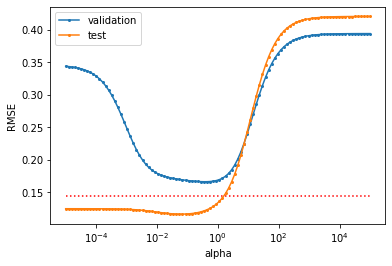

In [18]:
plt.plot(alphas,RMSE,"o-",markersize=2,label="validation")
plt.plot(alphas,testRMSE,"o-",markersize=2,label="test")
plt.legend()
plt.xscale("log")
plt.hlines([0.143781980986776], alphas[-1],alphas[0], "red", linestyles='dotted')
plt.xlabel("alpha")
plt.ylabel("RMSE")

In [19]:
#パラメータを見てみる
model = Ridge(alpha =0.10974987654930568, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
model.coef_

array([ 3.27980143e-04,  1.96452485e-06,  5.62695386e-02,  3.34173618e-02,
        1.20863530e-03,  8.39405307e-04,  1.47939834e-05,  3.68131667e-02,
       -6.88515382e-03,  2.52560257e-02, -8.10305196e-03,  1.13691122e-02,
        6.39860888e-03, -1.22951124e-05, -4.83578508e-02,  5.09983502e-05,
        1.80853437e-02,  6.07341639e-02,  1.01643715e-04,  4.15358538e-05,
        7.58917981e-06,  8.37416620e-05,  1.34922180e-02, -4.12082239e-02,
        1.58901556e-02,  3.24358472e-02,  1.96181149e-02,  1.21098698e-02,
        7.82491887e-06,  1.29176030e-02,  4.35172132e-02,  7.48787954e-05,
        8.26397296e-03,  1.18216783e-03,  2.05670319e-02,  9.22166453e-05,
        1.57130592e-05,  1.02370764e-04,  1.84827475e-04,  2.77631011e-04,
        1.02977709e-04, -6.90167004e-02,  4.51070534e-08, -5.21927242e-03,
        3.12552089e-02])

In [20]:
new_train.drop(["SalePrice"],axis=1).columns[model.coef_==0] #10個が0になっている。

Index([], dtype='object')

In [21]:
#Lasso回帰
from sklearn.linear_model import Lasso
RMSE=[]
r2_scores=[]
testRMSE=[]
alphas = 10**np.linspace(5, -10, 100)
for alpha in alphas:#parameter change
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', Lasso(alpha = alpha, normalize = True))])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, X_train, y_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))
    mdl=Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', Lasso(alpha = alpha, normalize = True))])
    mdl.fit(X_train, y_train)
    testRMSE.append(np.sqrt(mean_squared_error(y_valid['SalePrice'], mdl.predict(X_valid))))

In [22]:

print(min(RMSE))
print(alphas[RMSE.index(min(RMSE))])
print(min(testRMSE))
print(alphas[testRMSE.index(min(testRMSE))])

0.1661893076533753
0.00032745491628777317
0.11630067932522686
2.8480358684358048e-05


Text(0, 0.5, 'RMSE')

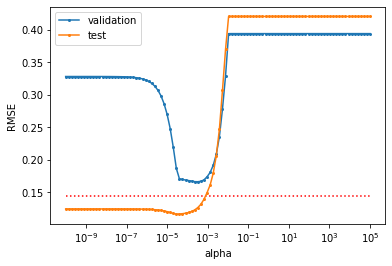

In [23]:
plt.plot(alphas,RMSE,"o-",markersize=2,label="validation")
plt.plot(alphas,testRMSE,"o-",markersize=2,label="test")
plt.legend()
plt.xscale("log")
plt.hlines([0.143781980986776], alphas[-1],alphas[0], "red", linestyles='dotted')
plt.xlabel("alpha")
plt.ylabel("RMSE")

パラメータを見てみるといくつかのパラメータが0になっている。

In [24]:
model = Lasso(alpha =5.72236765935022e-05, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
model.coef_

array([ 2.31168434e-04,  2.09897205e-06,  7.00785925e-02,  3.77355201e-02,
        1.61052387e-03,  5.25367315e-04,  0.00000000e+00,  2.50174414e-02,
       -5.74986380e-04,  2.00768802e-02, -0.00000000e+00,  9.38135935e-03,
        5.04270710e-03, -0.00000000e+00, -4.67042092e-02,  3.08029867e-05,
        1.75368956e-02,  5.35006211e-02,  8.03345037e-05,  0.00000000e+00,
       -0.00000000e+00,  1.41354444e-04,  9.16520933e-03, -3.59088714e-02,
        1.30367602e-02,  2.77998289e-02,  9.02965249e-03,  1.35659235e-02,
       -0.00000000e+00,  8.70077987e-03,  5.64512939e-02,  3.08353664e-05,
        5.17464527e-03,  0.00000000e+00,  1.55921300e-02,  7.88325290e-05,
        0.00000000e+00,  7.89177457e-05,  1.15112914e-04,  2.69329074e-04,
        0.00000000e+00, -5.52964238e-02,  0.00000000e+00, -3.52315884e-03,
        2.90283518e-02])

In [25]:
new_train.drop(["SalePrice"],axis=1).columns[model.coef_==0] #10個が0になっている。

Index(['MasVnrArea', 'BsmtCond', 'BsmtFinSF1', '2ndFlrSF', 'LowQualFinSF',
       'GarageYrBlt', 'GarageCond', 'OpenPorchSF', 'PoolArea', 'MiscVal'],
      dtype='object')